In [ ]:
pip install -u pandas-datareader

In [ ]:
pip install statsmodels 

In [1]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('fivethirtyeight')

In [2]:
#get stock price
df = web.DataReader('ZM', data_source='yahoo', start='2018-01-01', end='2021-05-01')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,66.000000,60.320999,65.000000,62.000000,25764700,62.000000
2019-04-22,68.900002,59.939999,61.000000,65.699997,9949700,65.699997
2019-04-23,74.168999,65.550003,66.870003,69.000000,6786500,69.000000
2019-04-24,71.500000,63.160000,71.400002,63.200001,4973500,63.200001
2019-04-25,66.849998,62.599998,64.739998,65.000000,3863300,65.000000
...,...,...,...,...,...,...
2021-04-26,338.000000,329.209991,337.510010,336.420013,2286700,336.420013
2021-04-27,341.679993,330.890015,336.390015,333.489990,2208300,333.489990
2021-04-28,334.700989,326.045013,330.239990,331.250000,1437600,331.250000


In [3]:
df.shape

(513, 6)

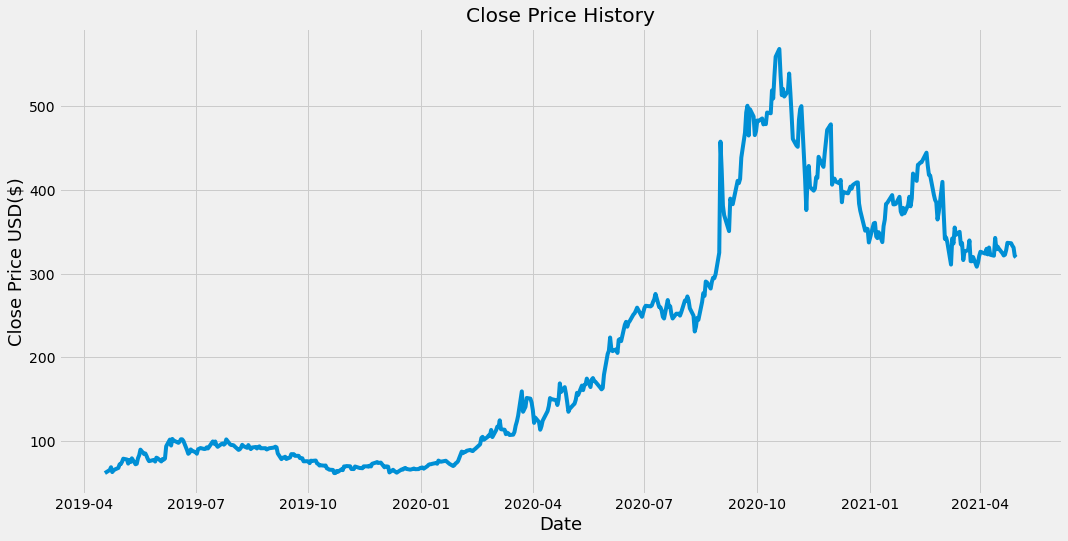

In [5]:
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [ ]:
# p = order of the AR term
# d = # of differencing required to make time series stationary
# q = the order of the MA term



In [6]:
df = df[['Close']].copy()

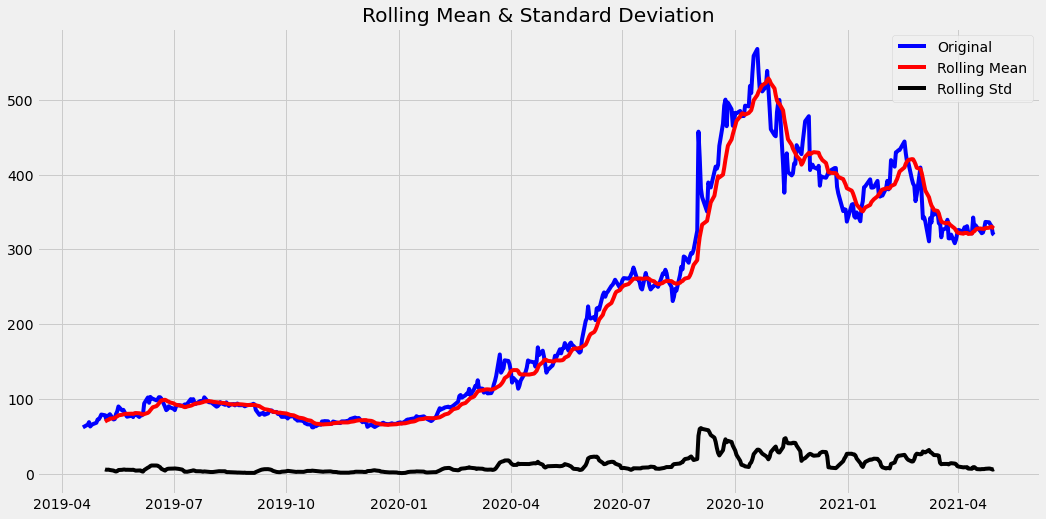

In [7]:
rollmean = df.rolling(12).mean()
rollstd = df.rolling(12).std()

plt.figure(figsize=(16, 8))
fig = plt.figure(1)
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
df.shape

(513, 1)

NameError: name 'pred' is not defined

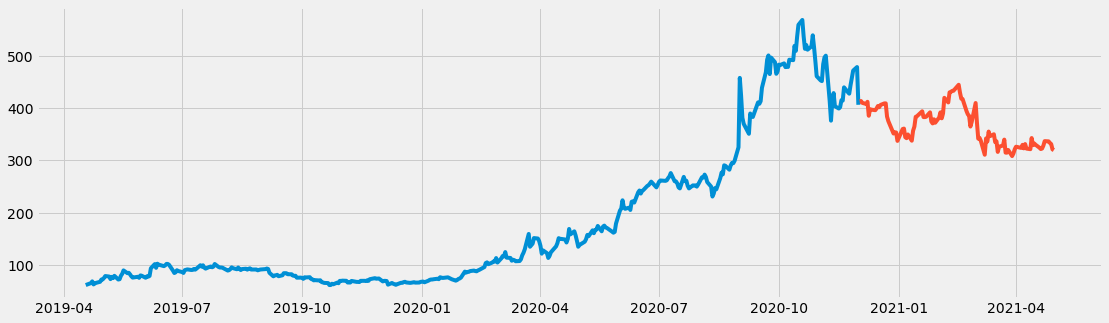

In [9]:
y_train = df.iloc[:410]
y_test = df.iloc[410:]

plt.figure(figsize=(17,5))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(pred,label='Predicted')
plt.ylabel("Stock prices")
plt.title(title,fontsize=20)
plt.legend()
plt.show()

In [10]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-12-02 00:00:00
end: 2021-04-30 00:00:00


In [11]:
y_test.shape

(103, 1)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
arima = ARIMA(y_train,order=(1,1,1)).fit(disp=False)
y_arima = arima.predict(410,512,typ='levels')
y_arima.index = y_test.index
mse(y_arima,y_test)

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

13024.093510466131

In [13]:
plot_pred(y_arima,"ARIMA Model")

NameError: name 'plot_pred' is not defined

In [ ]:
# ARMA model

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(410,512)
y_arma.index = y_test.index
mse(y_arma,y_test)

In [ ]:
plot_pred(y_arma,"ARMA Model")

In [ ]:
from sklearn.metrics import mean_squared_error as mse


In [ ]:
mean_squared_error(df['Close'][1:len(df)],y_arma)